In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date 
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import warnings # Supress warnings 
warnings.filterwarnings('ignore')


In [33]:
df_lake_b = pd.read_csv('data/Lake_Bilancino.csv')
df_lake_b.head(10)


,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
5,08/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.56,0.38
6,09/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.57,0.38
7,10/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.58,0.48
8,11/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.57,0.48
9,12/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.57,0.48


In [34]:
df_lake_b.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


In [35]:
df_lake_b.info()
df_lake_b.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


(6603, 9)

In [36]:
df_lake_b.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [37]:
print('Starting Date:' , df_lake_b['Date'].iloc[0],
      '\nEnding Date: ',df_lake_b["Date"].iloc[-1])

Starting Date: 03/06/2002 
Ending Date:  30/06/2020


In [38]:
df_lake_b['Date'].describe()


count           6603
unique          6603
top       30/06/2020
freq               1
Name: Date, dtype: object

In [39]:
df_lake_b['Date'] = pd.to_datetime(df_lake_b['Date'], format = '%d/%m/%Y')
df_lake_b['Date'].head()

0   2002-06-03
1   2002-06-04
2   2002-06-05
3   2002-06-06
4   2002-06-07
Name: Date, dtype: datetime64[ns]

In [40]:
print('Starting Date:' , df_lake_b['Date'].iloc[0],
      '\nEnding Date: ',df_lake_b["Date"].iloc[-1])

Starting Date: 2002-06-03 00:00:00 
Ending Date:  2020-06-30 00:00:00


In [41]:
df_lake_b[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate']].isna().sum()

Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [42]:
(df_lake_b == 0).sum()

Date                       0
Rainfall_S_Piero        3679
Rainfall_Mangona        3822
Rainfall_S_Agata        3755
Rainfall_Cavallina      4124
Rainfall_Le_Croci       3779
Temperature_Le_Croci       1
Lake_Level                 0
Flow_Rate                  0
dtype: int64

<Axes: >

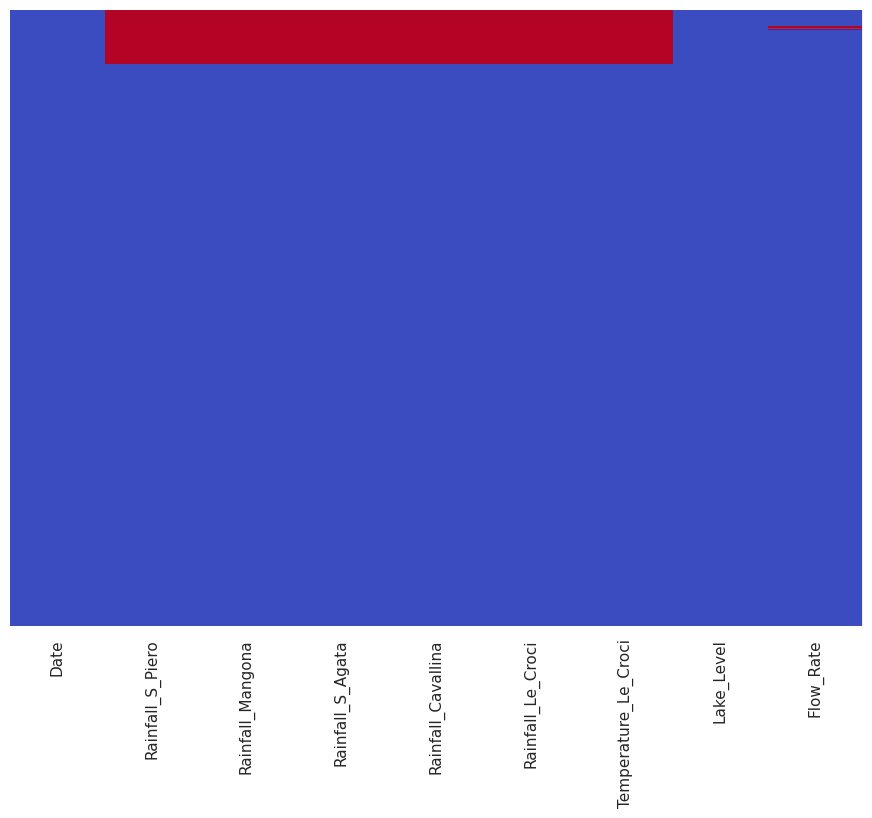

In [43]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df_lake_b.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

In [44]:
df_lake_b.isna().sum()

Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [45]:
df_lake_b.columns


Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [46]:
df = df_lake_b[df_lake_b.Temperature_Le_Croci.notna()].reset_index(drop=True)
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,2004-01-02,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
1,2004-01-03,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
2,2004-01-04,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
3,2004-01-05,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
4,2004-01-06,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5


In [47]:
df.isnull().sum()

Date                    0
Rainfall_S_Piero        0
Rainfall_Mangona        0
Rainfall_S_Agata        0
Rainfall_Cavallina      0
Rainfall_Le_Croci       0
Temperature_Le_Croci    0
Lake_Level              0
Flow_Rate               0
dtype: int64

In [48]:
print('Starting date is :' , df['Date'].iloc[0],
      '\nEnding Date is : ',df["Date"].iloc[-1])

Starting date is : 2004-01-02 00:00:00 
Ending Date is :  2020-06-30 00:00:00


In [49]:
df.head(25)

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,2004-01-02,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
1,2004-01-03,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
2,2004-01-04,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
3,2004-01-05,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
4,2004-01-06,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5
5,2004-01-07,0.0,0.0,0.0,0.0,0.0,3.65,251.43,0.5
6,2004-01-08,0.0,0.8,0.0,0.0,0.0,3.35,251.45,0.5
7,2004-01-09,4.6,5.8,3.8,5.6,7.8,5.55,251.49,0.5
8,2004-01-10,0.0,0.0,0.0,0.0,0.0,6.10,251.52,0.5
9,2004-01-11,0.0,0.0,0.0,0.0,0.0,6.25,251.53,0.5


In [50]:
df.describe()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6025,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000
mean,2012-04-01 00:00:00,2.471635,3.341212,2.670440,2.675187,3.130390,14.530141,249.553472,2.778204
min,2004-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.450000
25%,2008-02-16 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,247.930000,0.600000
50%,2012-04-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.240000,1.500000
75%,2016-05-16 00:00:00,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.370000,3.000000
max,2020-06-30 00:00:00,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000
std,NaN,6.650488,8.903769,7.167178,7.656404,8.025686,6.944029,2.183334,4.131176


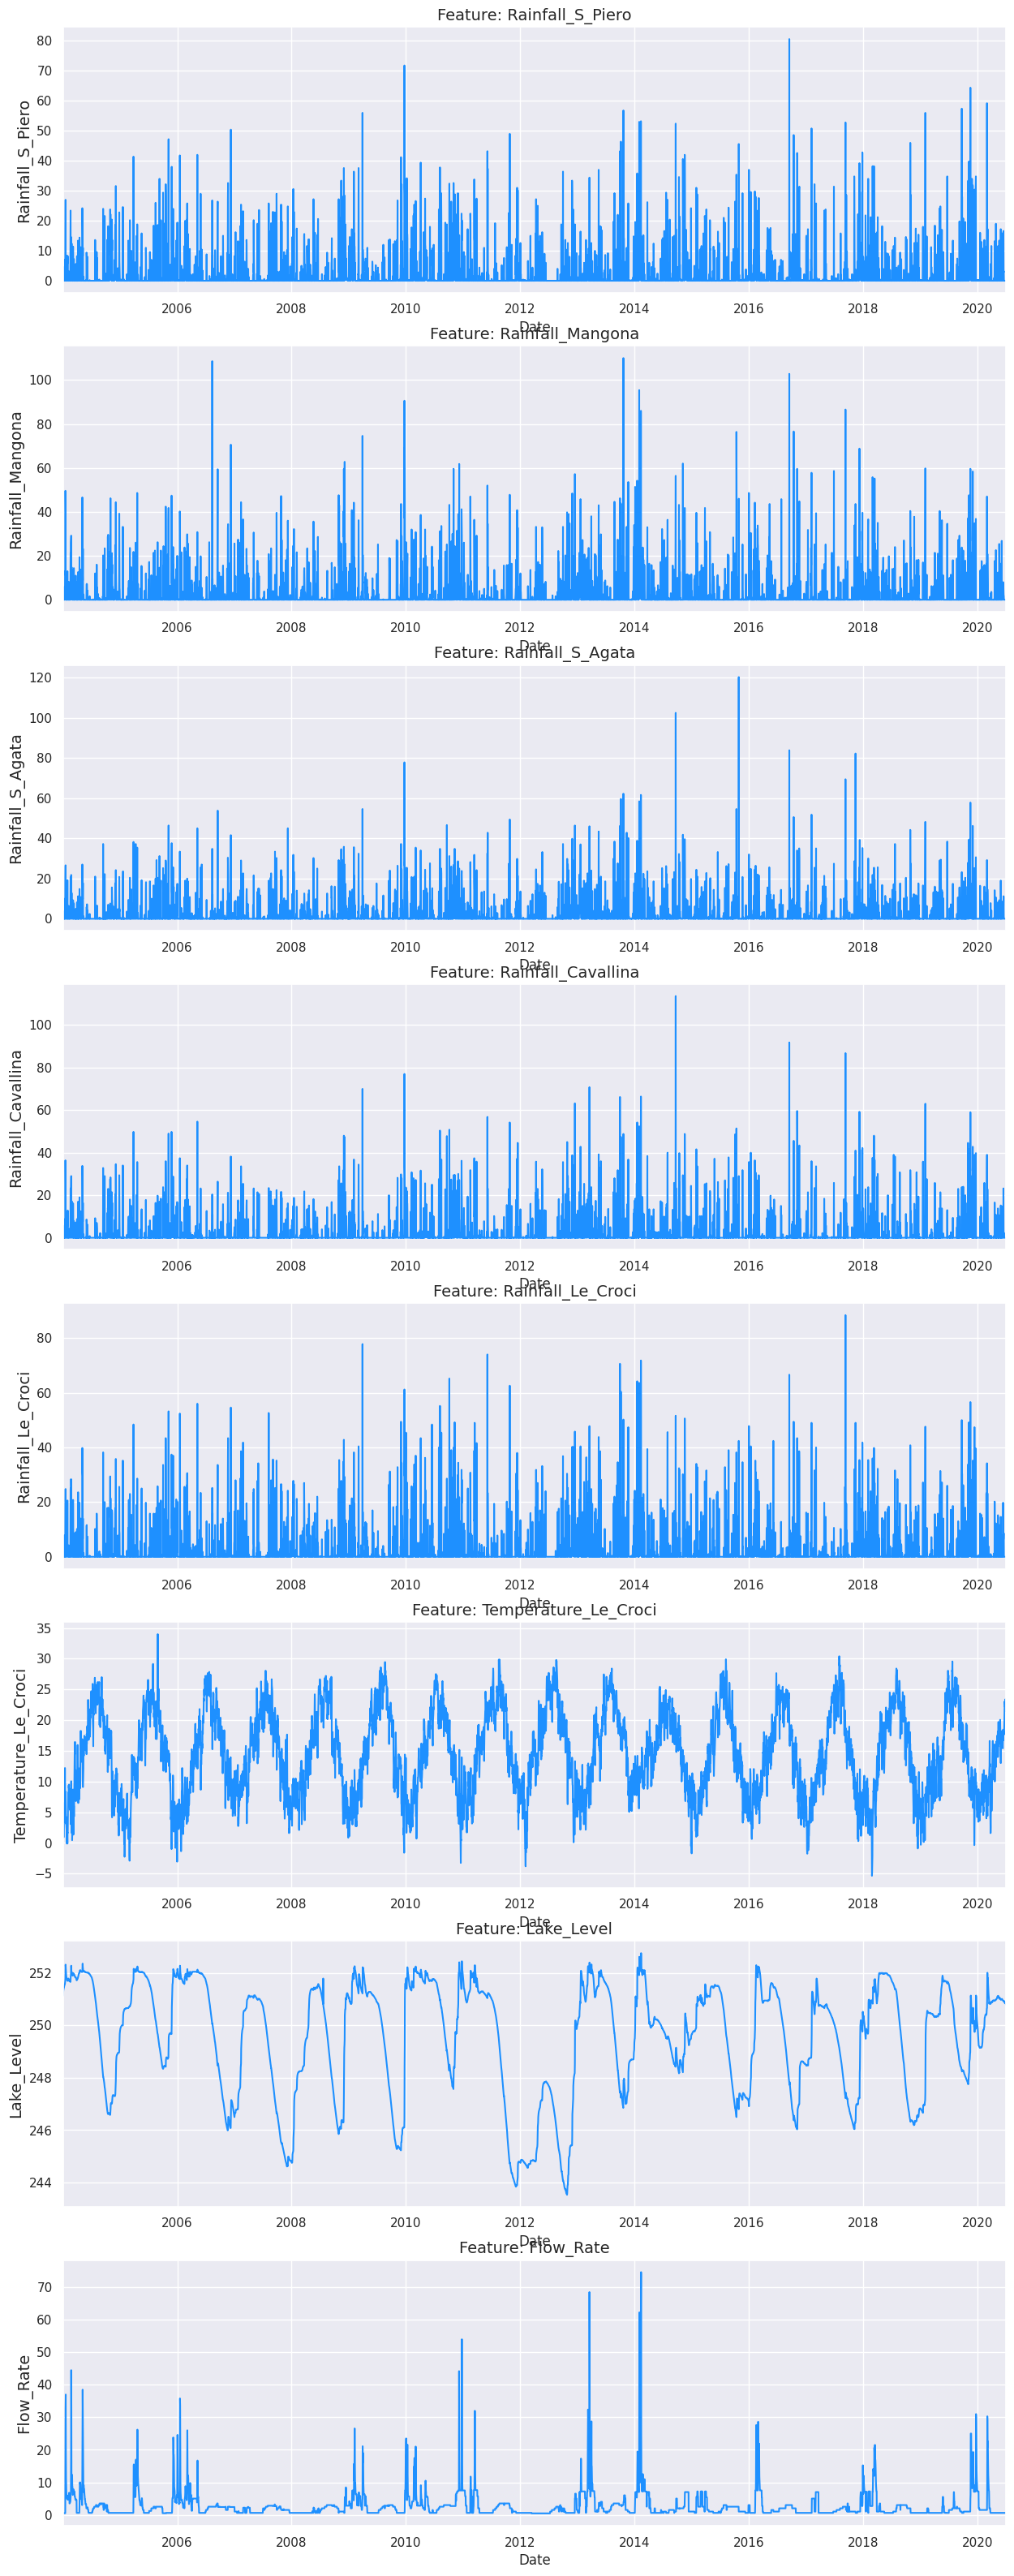

In [51]:
# To complete the data, as naive method, we will use .ffill()
f, ax = plt.subplots(nrows=8, ncols=1, figsize=(15, 40))

for i, column in enumerate(df_lake_b.drop('Date', axis=1).columns):
    sns.lineplot(x=df_lake_b['Date'], y=df_lake_b[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2004, 1, 2), date(2020, 7, 1)])     

In [52]:
df.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

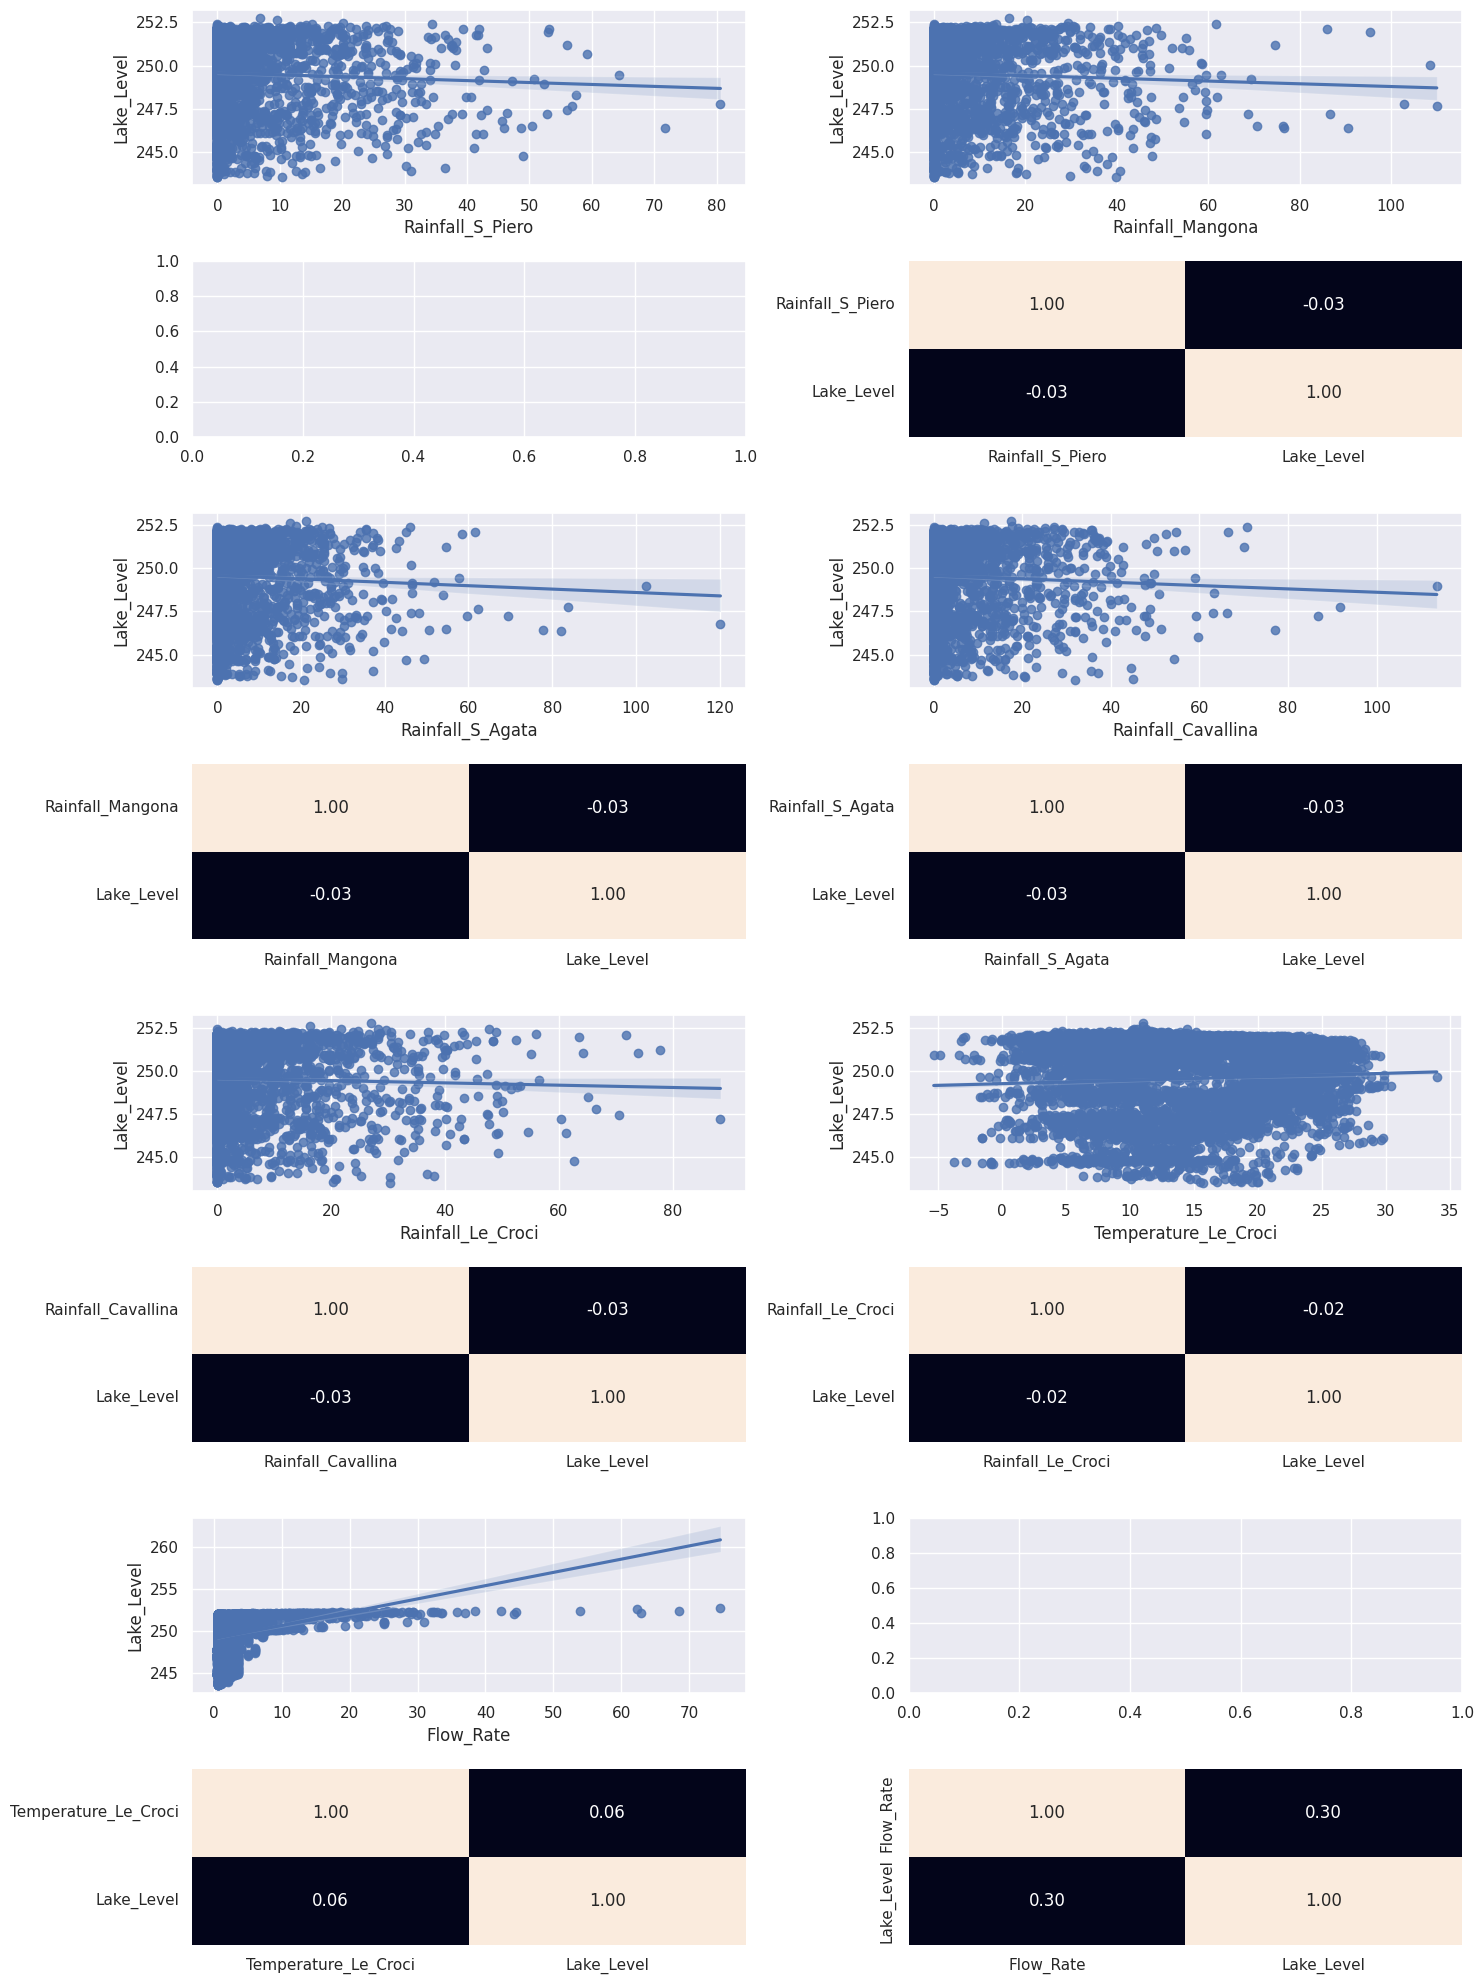

In [53]:
# Use Regplot to find regression line between variables against target variable

fig, axis = plt.subplots(8, 2, figsize=(15,20))

sns.regplot(ax=axis[0,0], data=df, x="Rainfall_S_Piero", y="Lake_Level", marker='o')
sns.heatmap(df[['Rainfall_S_Piero', 'Lake_Level']].corr(), annot=True, fmt=".2f", ax=axis[1,1], cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="Rainfall_Mangona", y="Lake_Level", marker='o')
sns.heatmap(df[['Rainfall_Mangona', 'Lake_Level']].corr(), annot=True, fmt=".2f", ax=axis[3,0], cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="Rainfall_S_Agata", y="Lake_Level", marker='o')
sns.heatmap(df[['Rainfall_S_Agata', 'Lake_Level']].corr(), annot=True, fmt=".2f", ax=axis[3,1], cbar=False)

sns.regplot(ax=axis[2,1], data=df, x="Rainfall_Cavallina", y="Lake_Level", marker='o')
sns.heatmap(df[['Rainfall_Cavallina', 'Lake_Level']].corr(), annot=True, fmt=".2f", ax=axis[5,0], cbar=False)

sns.regplot(ax=axis[4,0], data=df, x="Rainfall_Le_Croci", y="Lake_Level", marker='o')
sns.heatmap(df[['Rainfall_Le_Croci', 'Lake_Level']].corr(), annot=True, fmt=".2f", ax=axis[5,1], cbar=False)

sns.regplot(ax=axis[4,1], data=df, x="Temperature_Le_Croci", y="Lake_Level", marker='o')
sns.heatmap(df[['Temperature_Le_Croci', 'Lake_Level']].corr(), annot=True, fmt=".2f", ax=axis[7,0], cbar=False)

sns.regplot(ax=axis[6,0], data=df, x="Flow_Rate", y="Lake_Level", marker='o')
sns.heatmap(df[['Flow_Rate', 'Lake_Level']].corr(), annot=True, fmt=".2f", ax=axis[7,1], cbar=False)

#plt.delaxes(axis[4,1])
#lt.delaxes(axis[5,1])
plt.tight_layout()
plt.show()

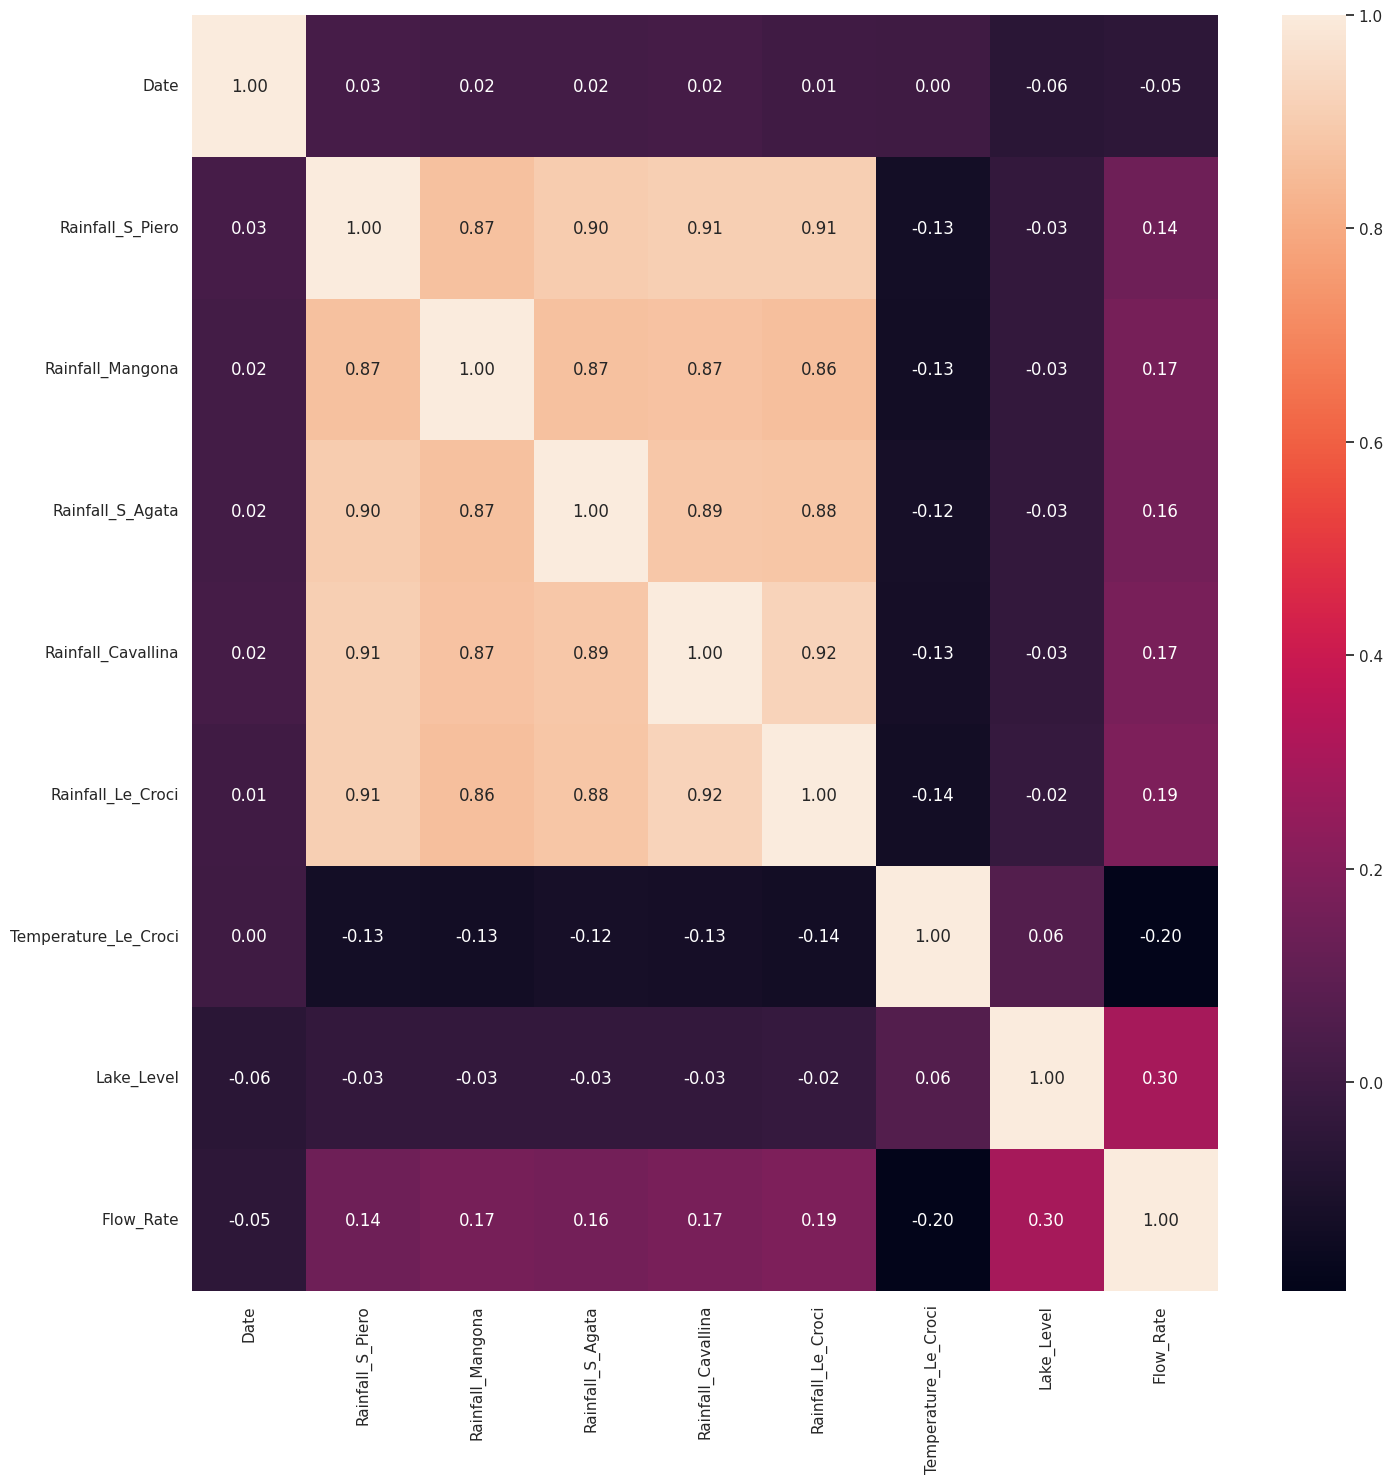

In [54]:
# Use Heatmap to find correlation to target variable 

fig, axis = plt.subplots(figsize=(15,15))

columns = df.columns

sns.heatmap(df[columns].corr(), annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

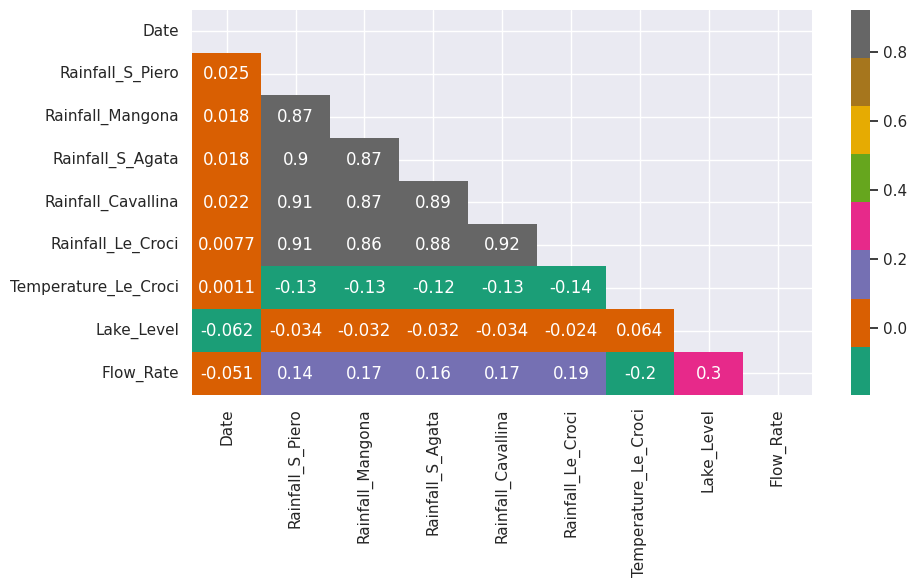

In [55]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

In [56]:
df = df.set_index('Date')
ts = df['Lake_Level']
ts.head()

Date
2004-01-02    251.21
2004-01-03    251.28
2004-01-04    251.35
2004-01-05    251.37
2004-01-06    251.42
Name: Lake_Level, dtype: float64

In [57]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

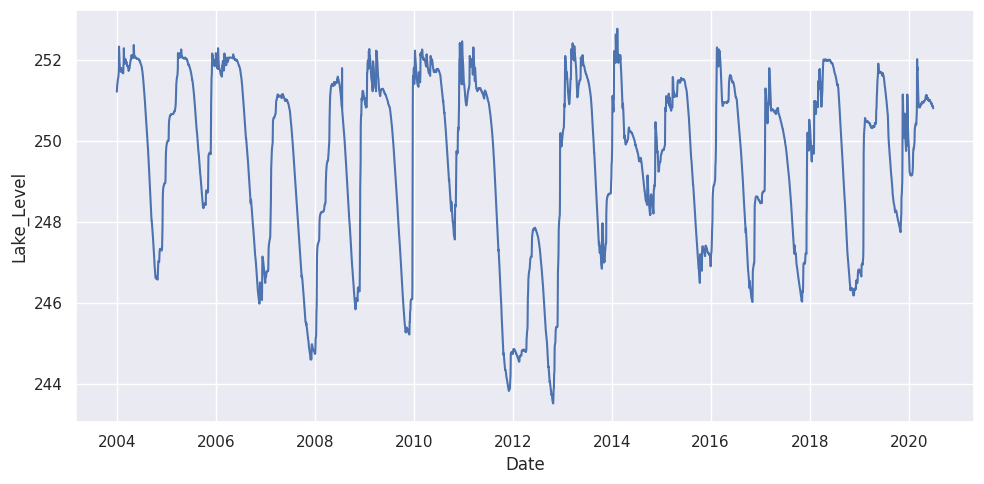

In [58]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [59]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

### Trend Analysis

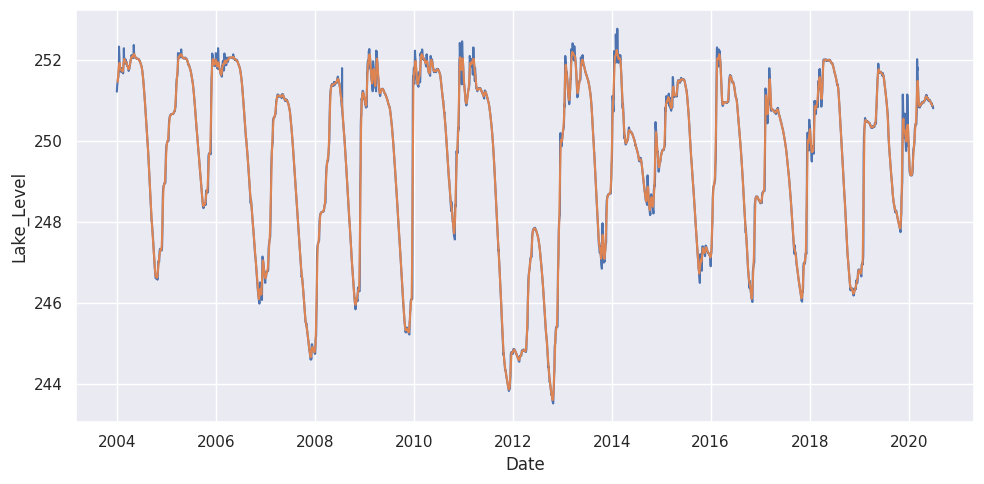

In [60]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

### Seasonality Analysis

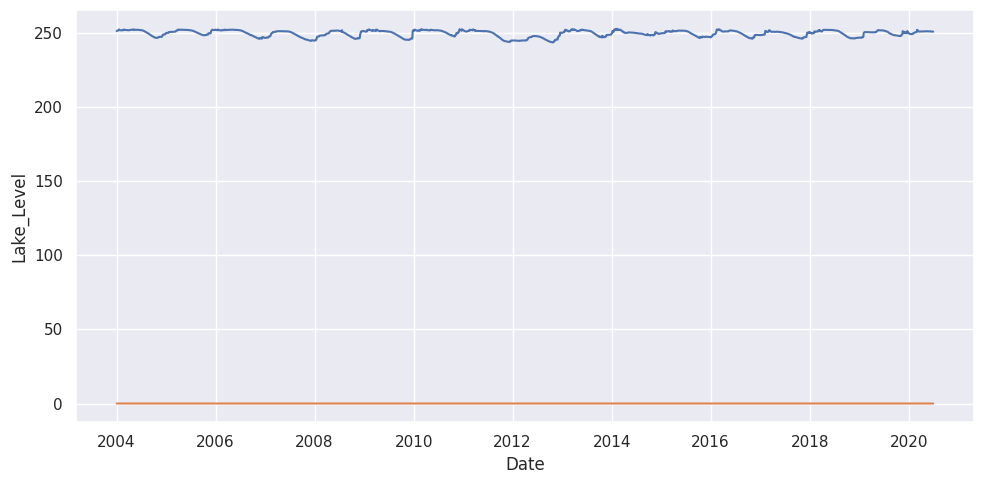

In [61]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

### Dickey-Fuller Test

In [62]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Dickey-Fuller test results:


Test Statistic                -5.699711e+00
p-value                        7.726367e-07
#Lags Used                     2.700000e+01
Number of Observations Used    5.997000e+03
Critical Value (1%)           -3.431441e+00
Critical Value (5%)           -2.862022e+00
Critical Value (10%)          -2.567027e+00
dtype: float64

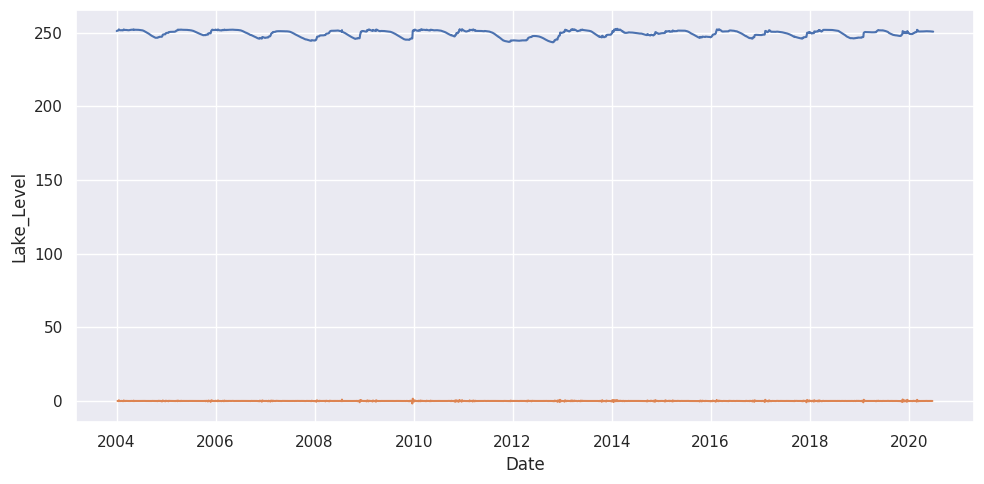

In [63]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

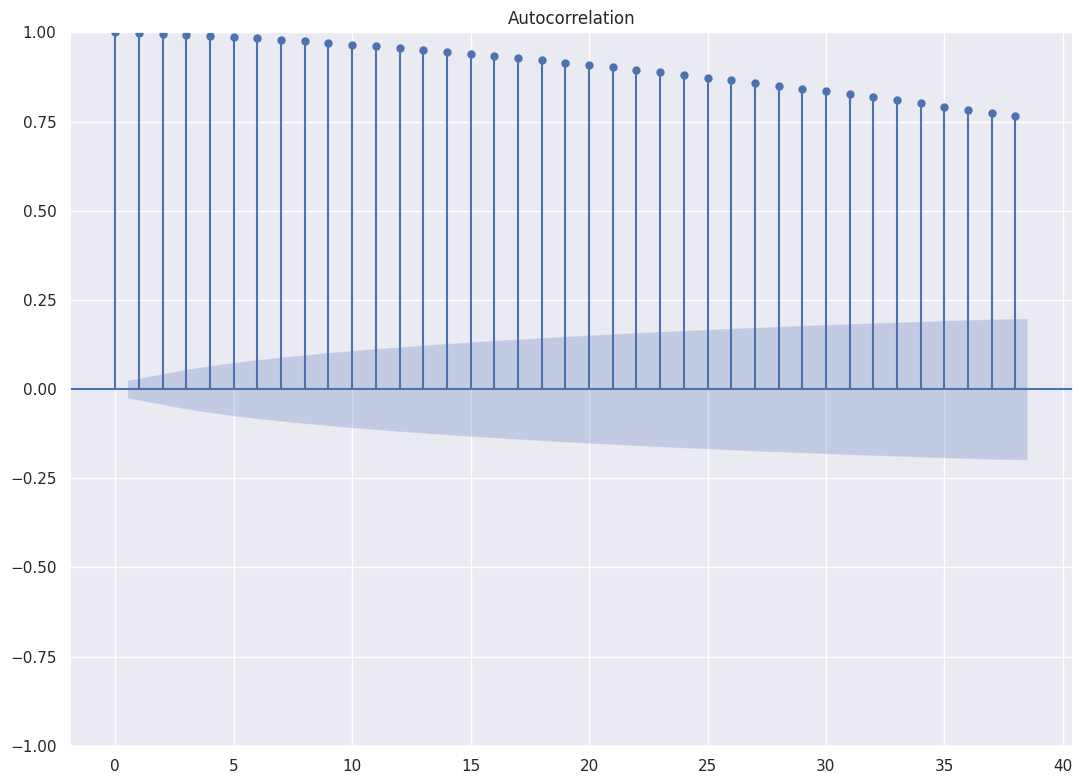

In [64]:
plot_acf(ts)

plt.tight_layout()

plt.show()

In [65]:
# Define the range for p, d, and q (can be adjusted as needed)
p = range(0, 4)  # Autoregressive term (p)
d = range(0, 2)  # Differencing term (d)
q = range(0, 4)  # Moving average term (q)

# Create a list of all possible (p, d, q) combinations
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best model and lowest AIC
best_aic = float("inf")
best_order = None
best_model = None

# Grid search over all combinations of p, d, q
for param in pdq:
    try:
        # Fit the ARIMA model for each (p, d, q) combination
        model = ARIMA(ts, order=param)
        model_fit = model.fit()
        
        # Get the AIC of the fitted model
        aic = model_fit.aic
        
        # Print the AIC value and the corresponding (p, d, q)
        print(f"ARIMA{param} AIC={aic}")
        
        # Save the best model (lowest AIC)
        if aic < best_aic:
            best_aic = aic
            best_order = param
            best_model = model_fit
    except Exception as e:
        # Print the error if model fitting fails for a specific (p, d, q)
        print(f"ARIMA{param} failed: {e}")
        continue

# Print the best ARIMA model found
print(f"\nBest ARIMA model: ARIMA{best_order} with AIC={best_aic}")

ARIMA(0, 0, 0) AIC=26510.488458847154
ARIMA(0, 0, 1) AIC=18398.228000568983
ARIMA(0, 0, 2) AIC=11542.13796032084
ARIMA(0, 0, 3) AIC=6367.612871140675
ARIMA(0, 1, 0) AIC=-10212.692265527272
ARIMA(0, 1, 1) AIC=-11236.017114562272
ARIMA(0, 1, 2) AIC=-11492.710208109538
ARIMA(0, 1, 3) AIC=-11564.278814587093
ARIMA(1, 0, 0) AIC=-10208.245781264995
ARIMA(1, 0, 1) AIC=-11233.472162419885
ARIMA(1, 0, 2) AIC=-11491.825207005686
ARIMA(1, 0, 3) AIC=-11564.605282101855
ARIMA(1, 1, 0) AIC=-11576.753715007913
ARIMA(1, 1, 1) AIC=-11637.628405874038
ARIMA(1, 1, 2) AIC=-11644.641409258023
ARIMA(1, 1, 3) AIC=-11669.759532628072
ARIMA(2, 0, 0) AIC=-11577.902554785625
ARIMA(2, 0, 1) AIC=-11641.713717005168
ARIMA(2, 0, 2) AIC=-11650.454386563835
ARIMA(2, 0, 3) AIC=-11673.660375116335
ARIMA(2, 1, 0) AIC=-11628.16256114704
ARIMA(2, 1, 1) AIC=-11680.690143101063
ARIMA(2, 1, 2) AIC=-11691.261457372408
ARIMA(2, 1, 3) AIC=-11689.446210129849
ARIMA(3, 0, 0) AIC=-11631.200630659627
ARIMA(3, 0, 1) AIC=-11644.854903

In [75]:
model = ARIMA(ts, order=(3,1,1))
model_fit = model.fit()

In [71]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Lake_Level   No. Observations:                 6025
Model:                 ARIMA(3, 1, 1)   Log Likelihood                5850.809
Date:                Wed, 23 Oct 2024   AIC                         -11691.618
Time:                        16:16:19   BIC                         -11658.100
Sample:                    01-02-2004   HQIC                        -11679.980
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3314      0.013    103.988      0.000       1.306       1.356
ar.L2         -0.2999      0.007    -45.150      0.000      -0.313      -0.287
ar.L3         -0.0489      0.005    -10.355      0.0

In [72]:
forecast = model_fit.forecast(60)
forecast

2020-07-01    250.789840
2020-07-02    250.782800
2020-07-03    250.777451
2020-07-04    250.772939
2020-07-05    250.768878
2020-07-06    250.765088
2020-07-07    250.761479
2020-07-08    250.758010
2020-07-09    250.754659
2020-07-10    250.751414
2020-07-11    250.748268
2020-07-12    250.745217
2020-07-13    250.742256
2020-07-14    250.739384
2020-07-15    250.736596
2020-07-16    250.733891
2020-07-17    250.731266
2020-07-18    250.728719
2020-07-19    250.726247
2020-07-20    250.723848
2020-07-21    250.721520
2020-07-22    250.719260
2020-07-23    250.717068
2020-07-24    250.714940
2020-07-25    250.712875
2020-07-26    250.710871
2020-07-27    250.708927
2020-07-28    250.707039
2020-07-29    250.705208
2020-07-30    250.703431
2020-07-31    250.701706
2020-08-01    250.700032
2020-08-02    250.698408
2020-08-03    250.696832
2020-08-04    250.695302
2020-08-05    250.693817
2020-08-06    250.692377
2020-08-07    250.690979
2020-08-08    250.689622
2020-08-09    250.688305


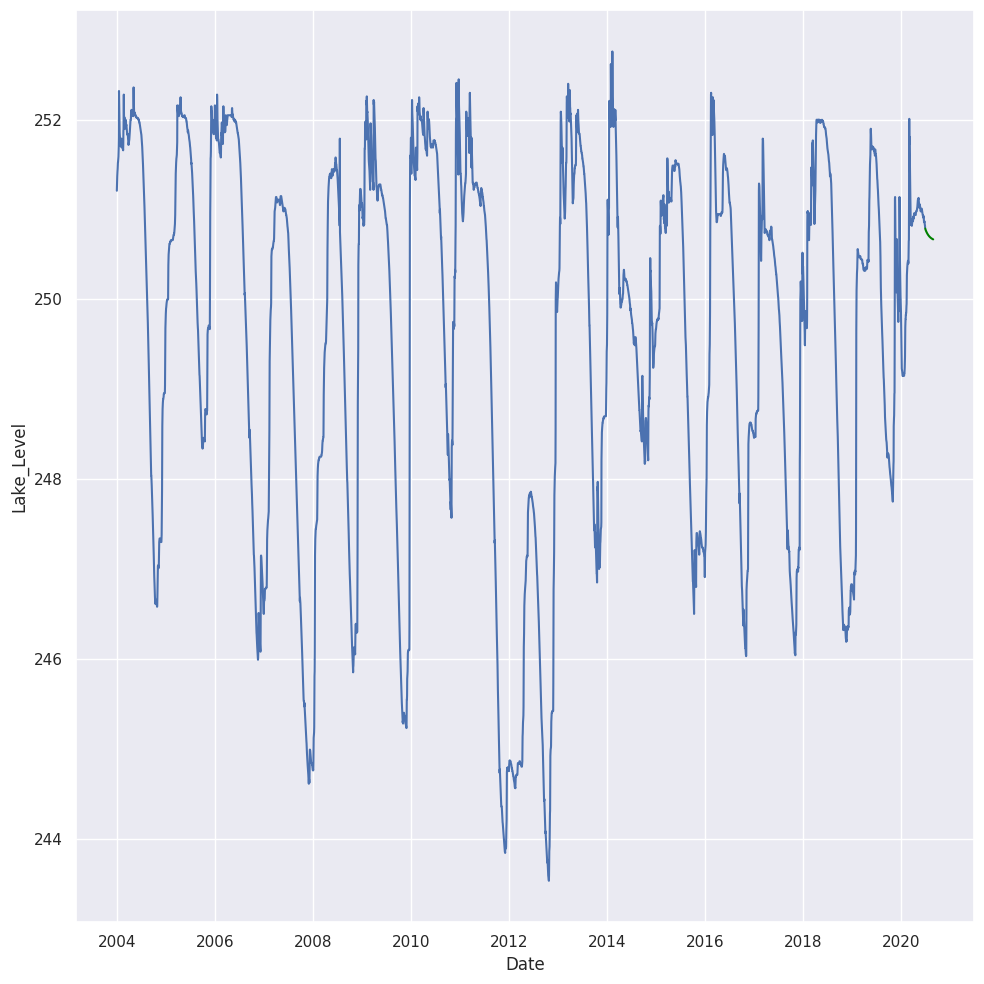

In [73]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.lineplot(data = ts)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

In [ ]:
# Save Model
from pickle import dump

dump(model, open('sales_projection_model.sav', 'wb'))